<div style="text-align: right" align="right"><i>Papara Ana Maria    </i></div>

# 2023 NBA season players statistics

This is an exploratory analysis of 2023 NBA season players data. <br>
The purpose of the current document is to create some meaningful visualization of the NBA players statistics.

### Introduction
In this analysis, the aim is to explore and visualize various performance metrics of basketball players during the 2023 season. By examining these metrics, I can gain insights into individual player performances and overall trends. 

### Data

Data used for analysis is from a Kaggle dataset: [NBA Players stats(2023 season)](https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season/data).
It is in *csv* format and has over 500 unique players and 30 columns describing different metrics.<br>
The dataset consists of multiple columns, each representing a specific attribute or performance metric of the players. The key columns in the dataset are:
>- **PName**: The name of the basketball player.
>- **POS**: The player's position in the game, including 'N/A'.
>- **Team**: The abbreviation of the team the player is currently playing for this season.
>- **Age**: The age of the player.
>- **GP**: The total number of games the player has played in this season.
>- **W**: The total number of games won by the player.
>- **L**: The total number of games lost by the player.
>- **Min**: The total minutes the player has played in this season.
>- **PTS**: The total points made by the player [target].
>- **FGM**: The total number of field goals made by the player.
>- **FGA**: The total number of field goals attempted by the player.
>- **FG**%: The percentage of successful field goals made by the player.
>- **3PM**: The total number of 3-point field goals made by the player.
>- **3PA**: The total number of 3-point field goals attempted by the player.
>- **3P**%: The percentage of successful 3-point field goals made by the player.
>- **FTM**: The total number of free throws made by the player.
>- **FTA**: The total number of free throws attempted by the player.
>- **FT**%: The percentage of successful free throws made by the player.
>- **OREB**: The total number of offensive rebounds made by the player.
>- **DREB**: The total number of defensive rebounds made by the player.
>- **REB**: The total number of rebounds (offensive + defensive) made by the player.
>- **AST**: The total number of assists made by the player.
>- **TOV**: The total number of turnovers made by the player.
>- **STL**: The total number of steals made by the player.
>- **BLK**: The total number of blocks made by the player.
>- **PF**: The total number of personal fouls made by the player.
>- **FP**: The total number of NBA fantasy points made by the player.
>- **DD2**: The total number of double-doubles made by the player.
>- **TD3**: The total number of triple-doubles made by the player.
>- **+/-**: The total difference between the player's team scoring and the opponents' scoring while the player is in the game.


### Experiments and visualizations
First of all, I import necessary libraries for creating visualizations:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

Then, read data and show the first 10 rows to have an idea of what it looks like

In [3]:
basketball_data = pd.read_csv('./2023_nba_player_stats.csv')
basketball_data.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


The description of the  dataset mentions that the **Position** column is the only one that can contain *null* values. So, let's get rid of those players who do not have the position specified.

In [4]:
print(len(basketball_data))
basketball_data = basketball_data[basketball_data['POS'].notna()]
print(len(basketball_data))

539
534


Now, to understand better what the dataset contains, let's look at the distribution of some key columns.<br>
The team column distribution shows for each team how many players are present in the dataset.

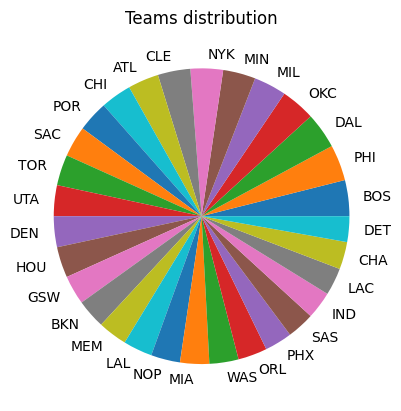

In [5]:
plt.pie(basketball_data['Team'].value_counts(),  labels=basketball_data['Team'].unique())
plt.title("Teams distribution")
plt.show()

Because of the high number of teams, the pie chart is not so helpful. Let's try to use a bar chart.

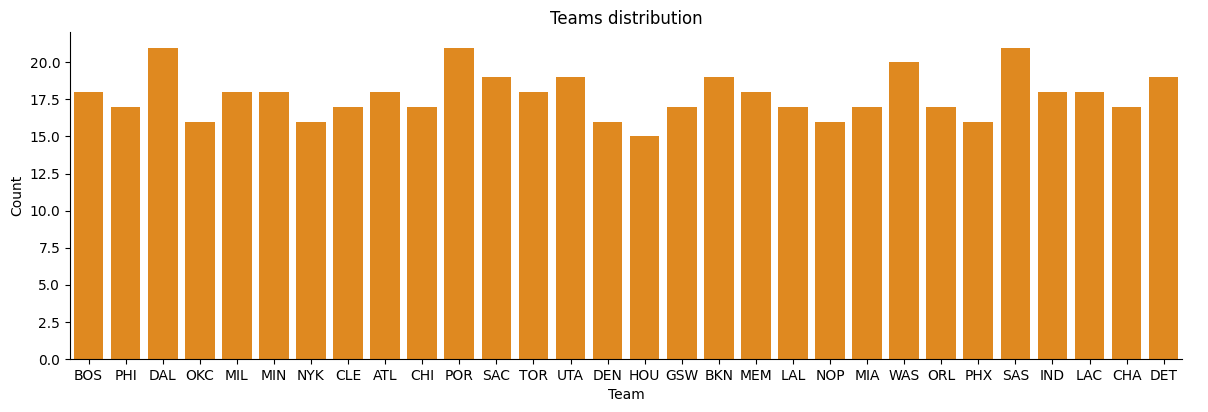

In [6]:
sns.catplot(data=basketball_data, kind='count', x='Team', height=4, aspect=30/10, color='darkorange')
plt.xlabel("Team")
plt.ylabel("Count")
plt.title('Teams distribution')
plt.show()

This looks better and also give an idea of the number of players for each team. The dataset seems to have a good distribution over teams.<br>
Now, let's see the distribution over positions:

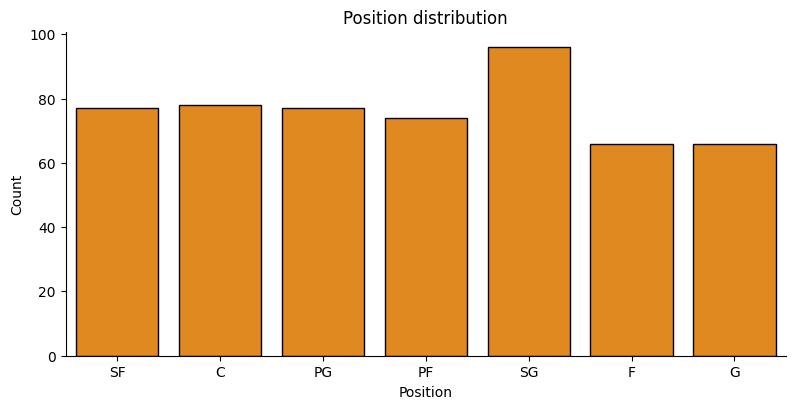

In [11]:
sns.catplot(data=basketball_data, kind='count', x='POS', height=4, aspect=20/10, color='darkorange',edgecolor='black')
plt.xlabel("Position")
plt.ylabel("Count")
plt.title('Position distribution')
plt.show()

Someone who is not so familiar with basketball game (like me) won't understand this plot.<br> For those, the x axis labels can be modified such to show the full name of the positions.  <br><br>
<img src="./positions.jpg" alt="Basketball positions" width="400" height="300"/>

Let's define a function that maps each short form of possition to the complete name

In [10]:
def map_position(labels):
    new_labels = []
    for l in labels:
        if (l=='PF'):
             new_labels.append('PowerForward')
        elif(l=='C'):
             new_labels.append('Center')
        elif(l=='SF'):
             new_labels.append('SmallForward')
        elif(l=='SG'):
             new_labels.append('ShootingGuard')
        elif(l=='PG'):
             new_labels.append('PointGuard')
        elif(l=='F'):
             new_labels.append('Forward')
        elif(l=='G'):
             new_labels.append('Guard')

    return new_labels  

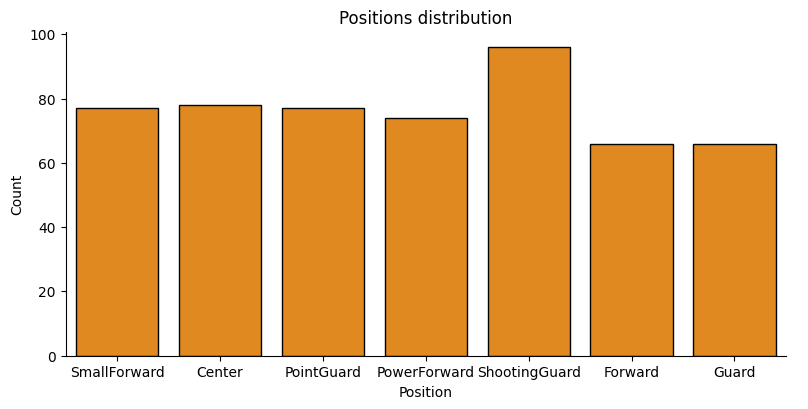

In [12]:
g = sns.catplot(data=basketball_data, kind='count', x='POS', height=4, aspect=20/10, color='darkorange',edgecolor='black')
plt.xlabel("Position")
plt.ylabel("Count")
plt.title('Positions distribution')

labels = [item.get_text() for item in g.ax.get_xticklabels()]
g.ax.xaxis.set_ticks(labels)
g.ax.set_xticklabels(map_position(labels))
plt.show()

<br>Now, let's see the efficiency for 2 points and 3 points goals for each position.<br> We have to group the dataset recordings by position column and then take the efficiency columns for field and 3pts goals: **FG%** and **3P%**.

In [20]:
pos_mean_field_goals = basketball_data.groupby('POS')['FG%'].mean()
pos_mean_3_goals = basketball_data.groupby('POS')['3P%'].mean()

mean_df = pd.concat([pos_mean_field_goals, pos_mean_3_goals], axis=1).reset_index()
mean_df

,POS,FG%,3P%
0,C,57.402564,23.937179
1,F,46.356061,31.468182
2,G,40.887879,29.506061
3,PF,48.405405,32.228378
4,PG,43.666234,34.022078
5,SF,45.676623,34.463636
6,SG,44.504167,35.888542


Let's plot this new dataframe using a bar chart.

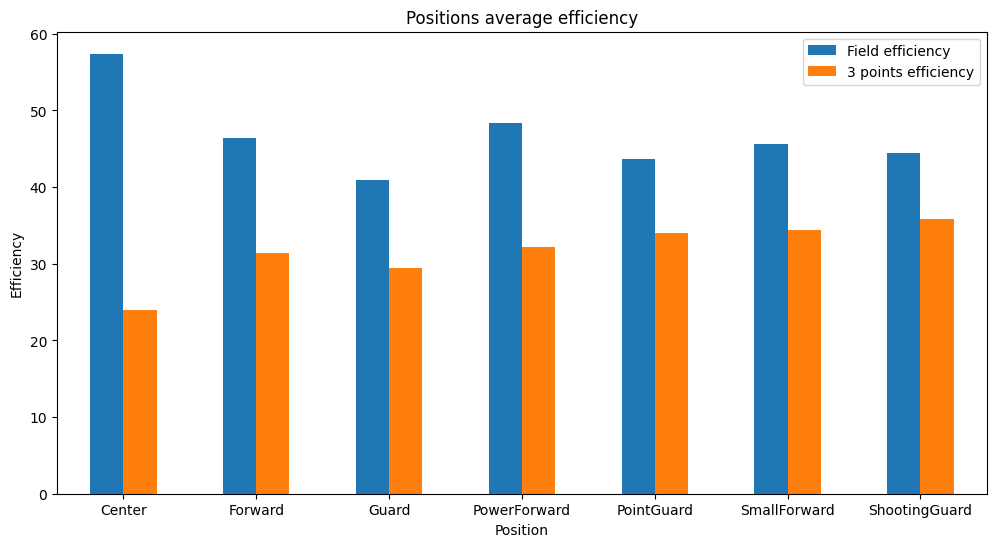

In [28]:
ax = mean_df.plot(x="POS", y=["FG%", "3P%"], kind="bar", figsize=(12,6)) 

plt.legend(['Field efficiency', '3 points efficiency'])
plt.xlabel("Position")
plt.ylabel("Efficiency")
plt.title('Positions average efficiency')

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(map_position(labels),rotation=0)
plt.show()

One interesting fact would be to see the number of minutes played in relation with the age of the player.

In [13]:
alt.Chart(basketball_data).mark_point().encode(
    x='Age:Q',
    y='Min:Q'
).properties(
    title="Age vs. minutes played"
)

alt.Chart(...)

But this simple chart with age on the x axis and the number of minutes on the y axis do not help too much. 

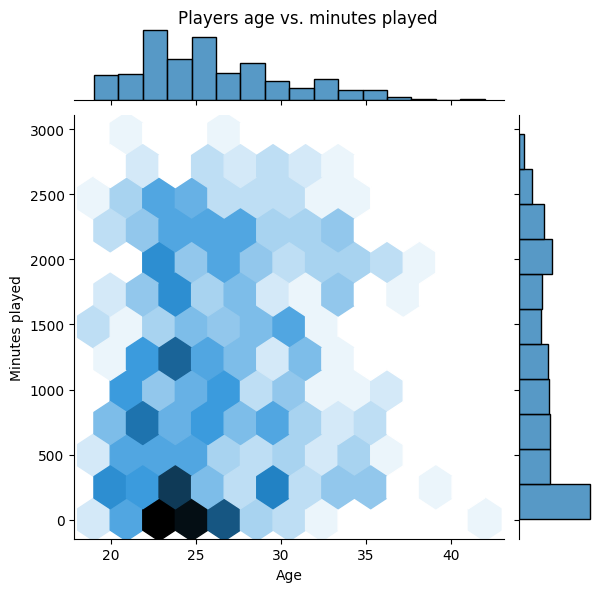

In [14]:
p=sns.jointplot(x=basketball_data["Age"], y=basketball_data["Min"], kind='hex')

plt.suptitle("Players age vs. minutes played")
plt.ylabel("Minutes played")
p.figure.subplots_adjust(top=0.95)
plt.show()

Once again, not even the seaborn jointplot is expressing the facts we want to see.<br>
So, we have to try another type of visualization. Probably, a line plot would be more suitable.

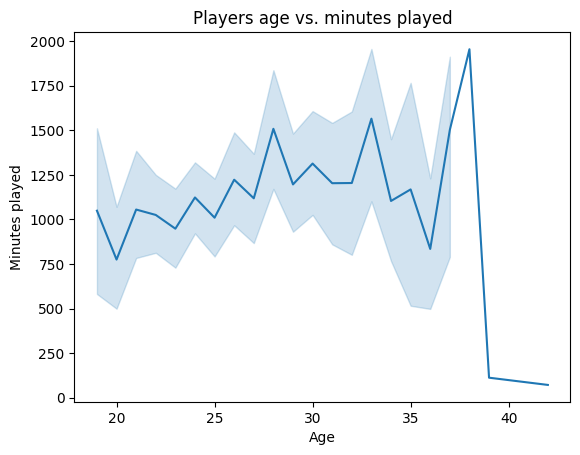

In [36]:
sns.lineplot(data=basketball_data, x= "Age", y="Min")
plt.title("Players age vs. minutes played")
plt.ylabel("Minutes played")
plt.show()

This seems to show what I was looking for. But, it is so different from the previous two plots even if it uses the same data.<br>
This is because these 2 types of plots have different purposes and highlight different aspects of the data.<br>
- The jointplot shows the distribution of players' ages versus minutes played, highlighting where data points are concentrated
- The line plot shows the average minutes played for each age, providing a picture of the overall trend.

Let's manually compute the average value for minutes played for each age group and plot using a bar plot.

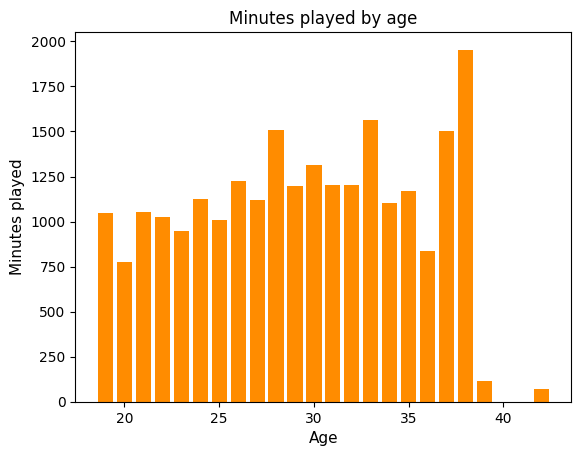

In [40]:
minutes_by_age = basketball_data.groupby('Age')['Min'].mean().reset_index()

plt.bar(minutes_by_age['Age'], minutes_by_age['Min'], color ='darkorange')

plt.title("Minutes played by age")
plt.ylabel("Minutes played",fontsize=11)
plt.xlabel("Age", fontsize=11)
plt.show()

This plot is highlighting the same trend as the seaborn lineplot but it provides more details about the actual number of mintes for each age.

In the same manner, let's look at other performance metrics related to the age of the players.

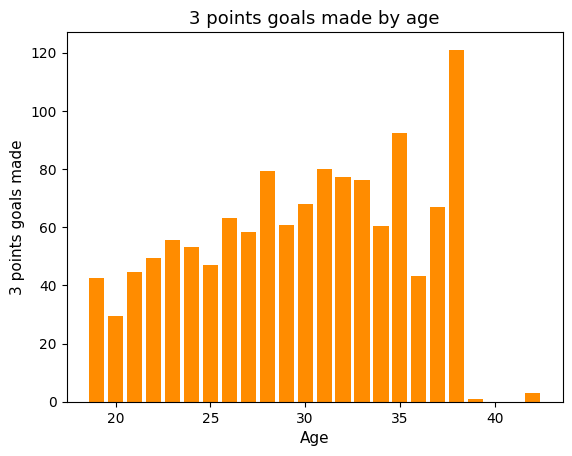

In [42]:
goals_3p_by_age = basketball_data.groupby('Age')['3PM'].mean().reset_index()

plt.bar(goals_3p_by_age['Age'], goals_3p_by_age['3PM'], color ='darkorange')

plt.title("3 points goals made by age", fontsize=13)
plt.ylabel("3 points goals made",fontsize=11)
plt.xlabel("Age", fontsize=11)
plt.show()

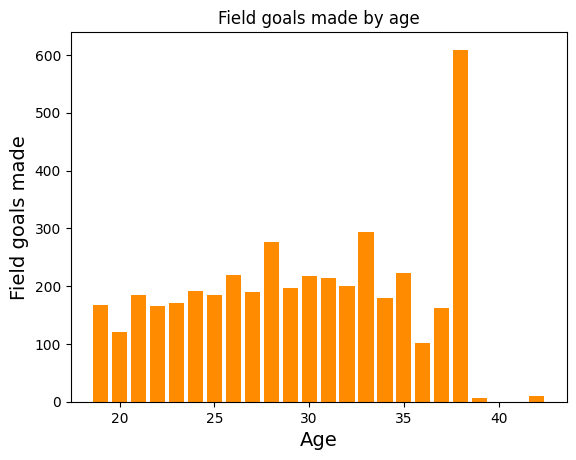

In [114]:
field_goals_by_age = basketball_data.groupby('Age')['FGM'].mean().reset_index()

plt.title("Field goals made by age")
plt.bar(field_goals_by_age['Age'], field_goals_by_age['FGM'], color ='darkorange')
plt.ylabel("Field goals made",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.show()

It looks like the players who are 38–39 years old are more successful in goals made. The difference is a bit surprising.<br>
 Could it be related to an inequal distribution of data over age?

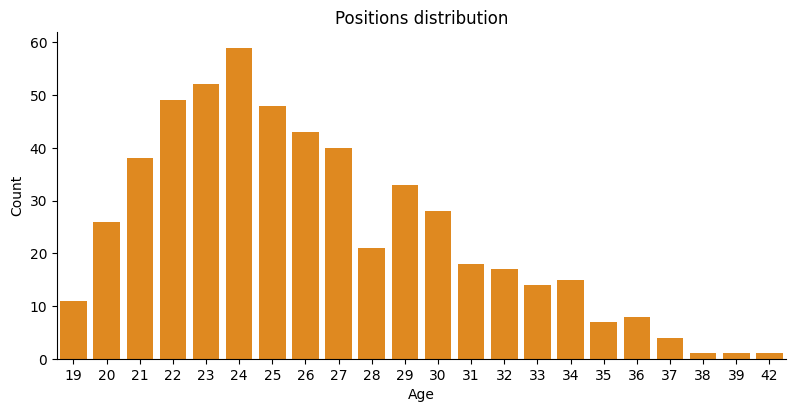

In [16]:
g = sns.catplot(data=basketball_data, kind='count', x='Age', height=4, aspect=20/10, color='darkorange')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title('Positions distribution')

plt.show()

Yes, this plot confirms that the small number of experienced players (38-39 years old) and also their great performance creates the prominet differences between 38-39 and other age vales in the prevoius plots.

Let's now analyse a bit the free throws related data.<br>
One idea is to show the free throws success rate average for each game position

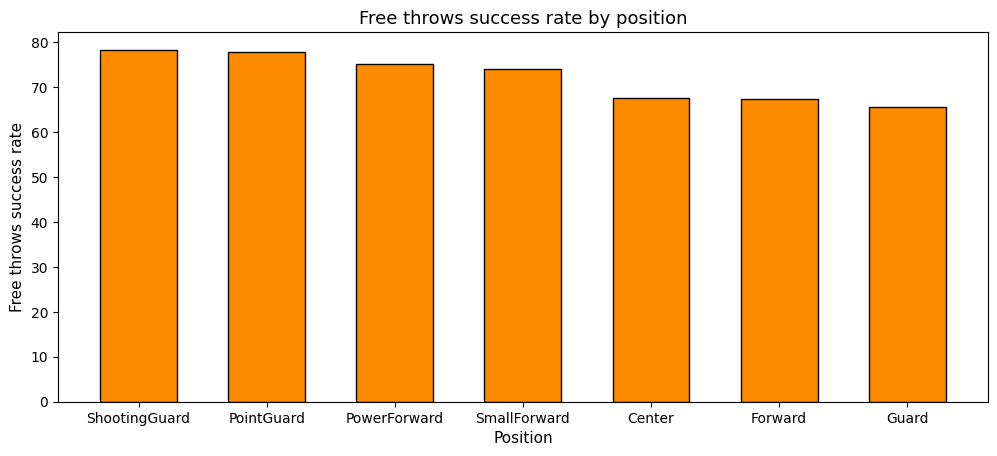

In [33]:
free_throws_rate_by_position = basketball_data.groupby('POS')['FT%'].mean().reset_index()

fig, ax = plt.subplots(1)

free_throws_rate_by_position = free_throws_rate_by_position.sort_values(by=['FT%'], ascending=False)
plt.bar(free_throws_rate_by_position['POS'], free_throws_rate_by_position['FT%'], color ='darkorange',width=0.6, edgecolor='black')

plt.title("Free throws success rate by position",fontsize=13)
plt.ylabel("Free throws success rate",fontsize=11)
plt.xlabel("Position", fontsize=11)
fig.set_figwidth(12)

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.xaxis.set_ticks(labels)
ax.set_xticklabels(map_position(labels),rotation=0)
plt.show()


This plot achieves it purpose, but it seems like the free throws efficiency do not depends so much on the position.<br>
Let's try to see free throws efficiency by age.

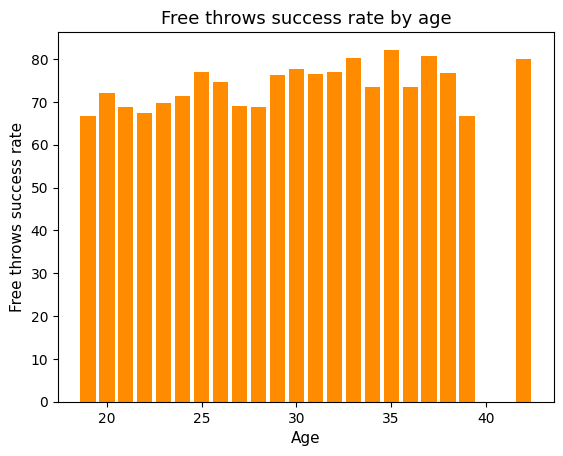

In [54]:
free_throws_rate_by_age = basketball_data.groupby('Age')['FT%'].mean().reset_index()

plt.bar(free_throws_rate_by_age['Age'], free_throws_rate_by_age['FT%'], color ='darkorange')

plt.title("Free throws success rate by age",fontsize=13)
plt.ylabel("Free throws success rate",fontsize=11)
plt.xlabel("Age", fontsize=11)
plt.show()

Just the same case here: the free throws efficiency do not seems to depend so much on the age.

Moving on to another columns. <br> 
Let's compare the offensive and defensive rebounds. We can compare it also regarding the age of the players.

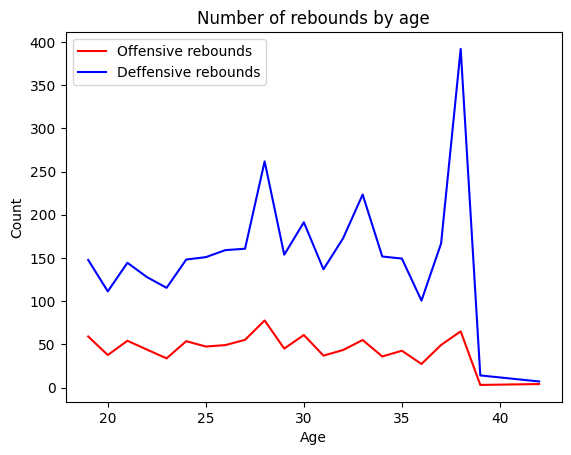

In [56]:
sns.lineplot(data=basketball_data, x= "Age", y="OREB", color="red",errorbar=None)
sns.lineplot(data=basketball_data, x= "Age", y="DREB", color="blue",errorbar=None)
plt.ylabel("Count")
plt.legend(["Offensive rebounds","Defensive rebounds"])
plt.title("Number of rebounds by age")
plt.show()

Looks like there are 2 spikes: one that is expected between 25 and 30 years but the second one, that is so huge, is, again, due to the inequal distribution of players over age and the small number of players with 38-39 years.
<br>
Moreover, from this plot we can see the different trends in offensive vs defensive rebounds: there are way more defensive rebounds than offensive.

Let's see the number of rebounds by the player position.

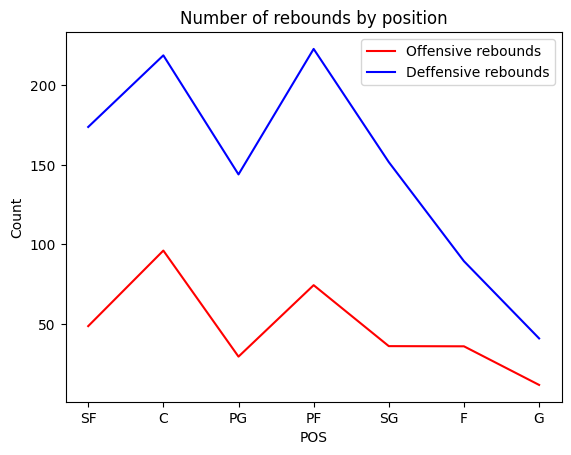

In [61]:
sns.lineplot(data=basketball_data, x= "POS", y="OREB", color="red",errorbar=None)
sns.lineplot(data=basketball_data, x= "POS", y="DREB", color="blue",errorbar=None)

plt.ylabel("Count")
plt.legend(["Offensive rebounds","Deffensive rebounds"])
plt.title("Number of rebounds by position")
plt.show()

Oh, no! The nominal values are not suitable for line plots.<br>
Most likely, this can be solved by a bar chart.

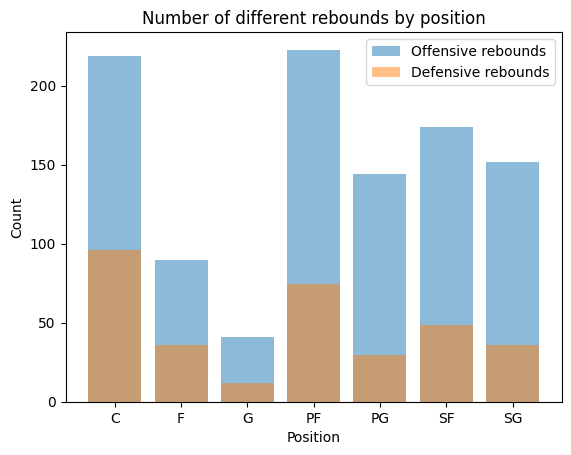

In [63]:
off_rebounds_by_pos = basketball_data.groupby('POS')['OREB'].mean().reset_index()
def_rebounds_by_pos = basketball_data.groupby('POS')['DREB'].mean().reset_index()

plt.bar(def_rebounds_by_pos['POS'], def_rebounds_by_pos['DREB'], alpha=0.5, label="Defensive rebounds")
plt.bar(off_rebounds_by_pos['POS'], off_rebounds_by_pos['OREB'], alpha=0.5, label="Offensive rebounds")


plt.legend(["Offensive rebounds","Defensive rebounds"])
plt.ylabel("Count")
plt.xlabel("Position")
plt.title("Number of different rebounds by position")
plt.show()

This looks satisfiable, but I think it would look better if the bars do not overlap.<br>
We can try with grouped bars.

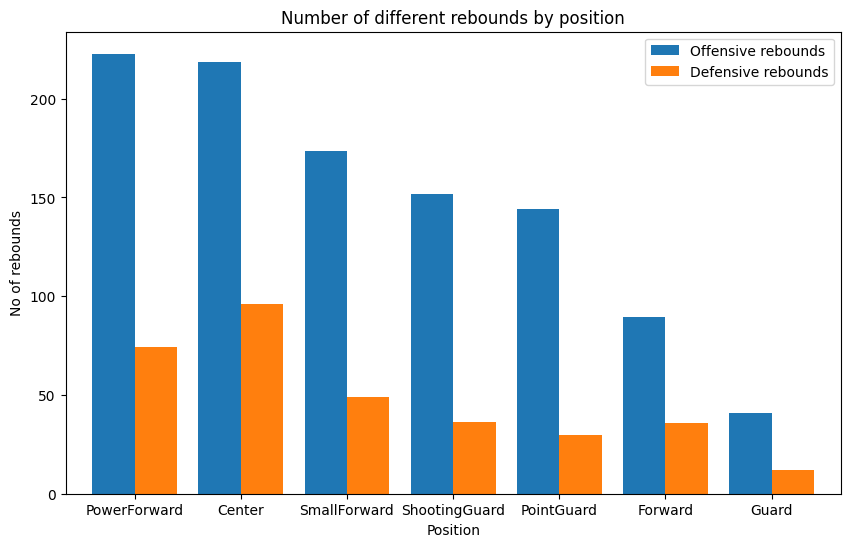

In [37]:
off_rebounds_by_pos = basketball_data.groupby('POS')['OREB'].mean()
def_rebounds_by_pos = basketball_data.groupby('POS')['DREB'].mean()

mean_df = pd.concat([off_rebounds_by_pos, def_rebounds_by_pos], axis=1).reset_index()
mean_df = mean_df.sort_values(by=['DREB'], ascending=False)
ax = mean_df.plot(x="POS", y=["DREB", "OREB"], kind="bar",width=0.8,figsize=(10,6))

plt.legend(["Offensive rebounds","Defensive rebounds"])
plt.ylabel('No of rebounds')
plt.xlabel('Position')
plt.title("Number of different rebounds by position")

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(map_position(labels),rotation=0)
plt.show()

The results are as expected because the power forward and the center are the ones that are closest to the bascket.

Let's try now some more complex plots related to the player impact on the team performance.<br> 
The problem is that the dataset does not contain any team specific data. All the columns are only related to the player.<br>
But we can use the last column from the dataset to achieve this. The **'+/-'** column describes the total difference between the player's team scoring and the opponents' scoring while the player is in the game.<br>
From now, I will refer to this metric as the impact of the player in the team performance.<br>

Let's choose one team and analyse it's player performance. Because I do not have a favourite and the first player from the dataset is playing for Boston, I will choose Boston. :) 

In [67]:
basketball_data[basketball_data['Team']=='BOS']['+/-']

0      470
13     256
95     488
98     182
153    240
183    206
192    309
223    219
266    204
308    173
312     12
321     61
369    105
477    -13
489    -71
492     -6
505     -4
519     -5
Name: +/-, dtype: int64


This is a list with the player index and their impact value on the team performance. 
<br> Let's plot this.

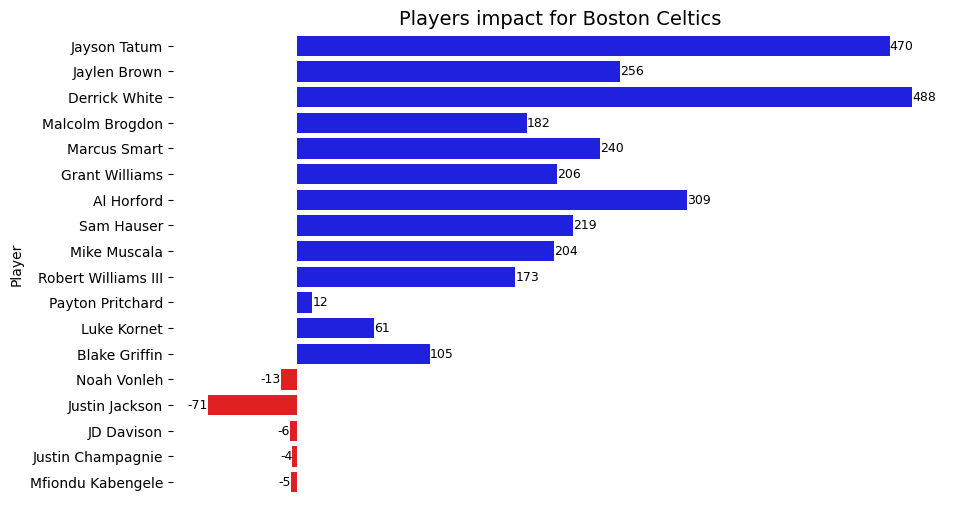

In [69]:
team_BOS = basketball_data[basketball_data['Team']=='BOS']

plt.figure(figsize=(10, 6))  
sns.barplot(data=team_BOS, x='+/-',  y='PName',hue='PName', legend=False, palette=['red' if x < 0 else 'blue' for x in team_BOS['+/-']]) 
for index, value in enumerate(team_BOS['+/-']):
     plt.text(value, index, f'{value:.0f}', va='center', ha='right' if value < 0 else 'left', fontsize=9, color='black')


plt.xlabel('')
plt.ylabel('Player')
plt.title('Players impact for Boston Celtics', fontsize=14)
plt.xticks([])
sns.despine(left=True, bottom=True)
plt.show()

To be more clear, let's sort descending by the impact.

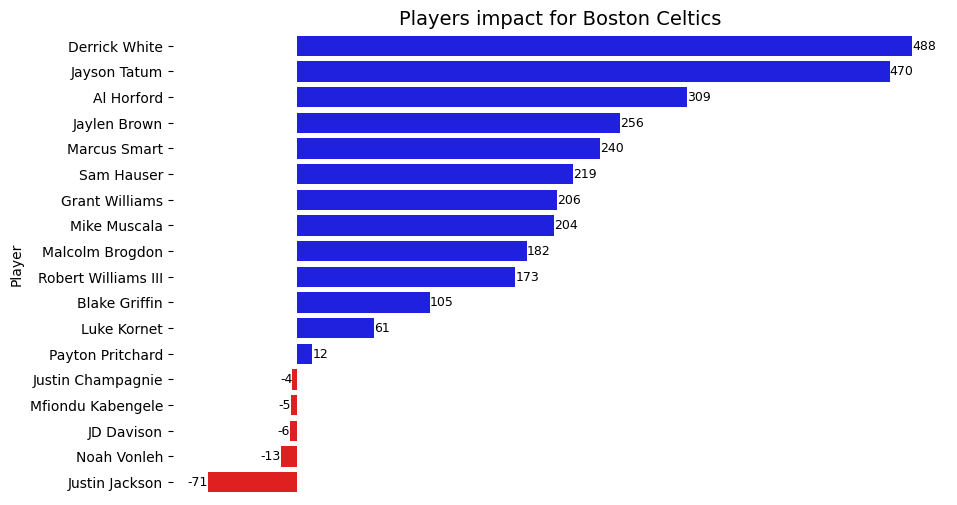

In [72]:
team_BOS = basketball_data[basketball_data['Team']=='BOS']
team_BOS = team_BOS.sort_values('+/-', ascending=False)

plt.figure(figsize=(10, 6))  
sns.barplot(data=team_BOS, x='+/-',  y='PName',hue='PName', legend=False, palette=['red' if x < 0 else 'blue' for x in team_BOS['+/-']]) 
for index, value in enumerate(team_BOS['+/-']):
     plt.text(value, index, f'{value:.0f}', va='center', ha='right' if value < 0 else 'left', fontsize=9, color='black')


plt.xlabel('')
plt.ylabel('Player')
plt.title('Players impact for Boston Celtics', fontsize=14)
plt.xticks([])
sns.despine(left=True, bottom=True)
plt.show()

Better now.

Knowing this, let's try to visualize the impact in relation to some other performance metrics to see what they bring to the team or what their drawbacks are.<br>
Let's choose some offensive related metrics but also some defensive ones. 

- **defensive**: Steals and Blocks
- **offensive**: Total points and Assists


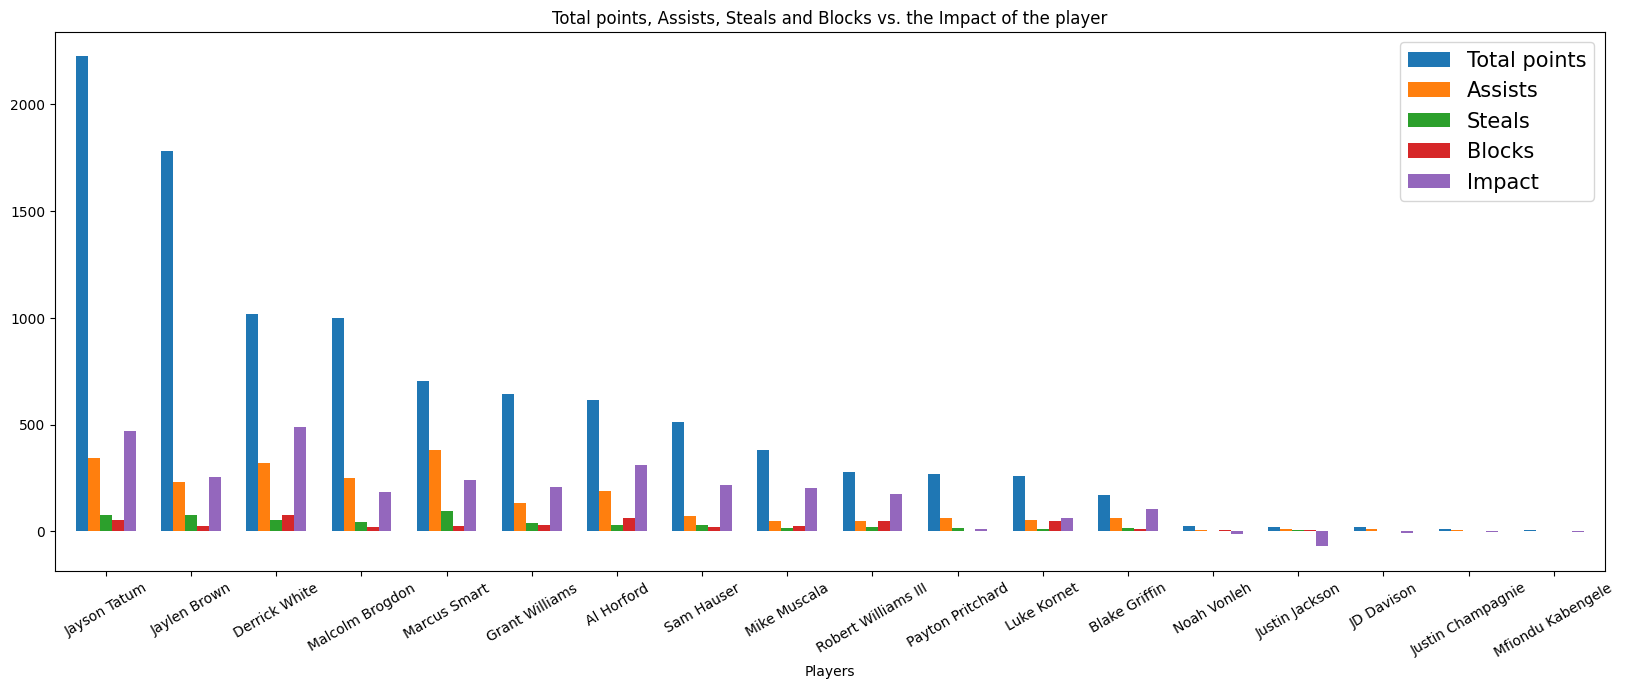

In [74]:
team_BOS = basketball_data[basketball_data['Team']=='BOS']

no_points = team_BOS['PTS']
assists = team_BOS['AST']

steals = team_BOS['STL']
blocks = team_BOS['BLK']

mean_df = pd.concat([team_BOS['PName'], no_points, assists,steals,blocks,team_BOS['+/-']], axis=1).reset_index()
mean_df = mean_df.sort_values(by=['PTS'], ascending=False)

ax = mean_df.plot(x="PName", y=[ "PTS","AST","STL", "BLK", "+/-"], kind="bar",width=0.7,rot=30,figsize=(20,7))

plt.legend(["Total points", "Assists","Steals","Blocks", "Impact"],fontsize=15)
plt.xlabel('Player')
plt.title('Total points, Assists, Steals and Blocks vs. the Impact of the player')
plt.show()

Oh, because of the value ranges for each metric that are very dispersed, the plot is not so expressive and also not what I was looking for.<br>
Firstly, I think 'Total points' is not a suitable metric for this analysis because its ranges are very different from the ranges for the other metrics.<br><br>
Let's try without total points.

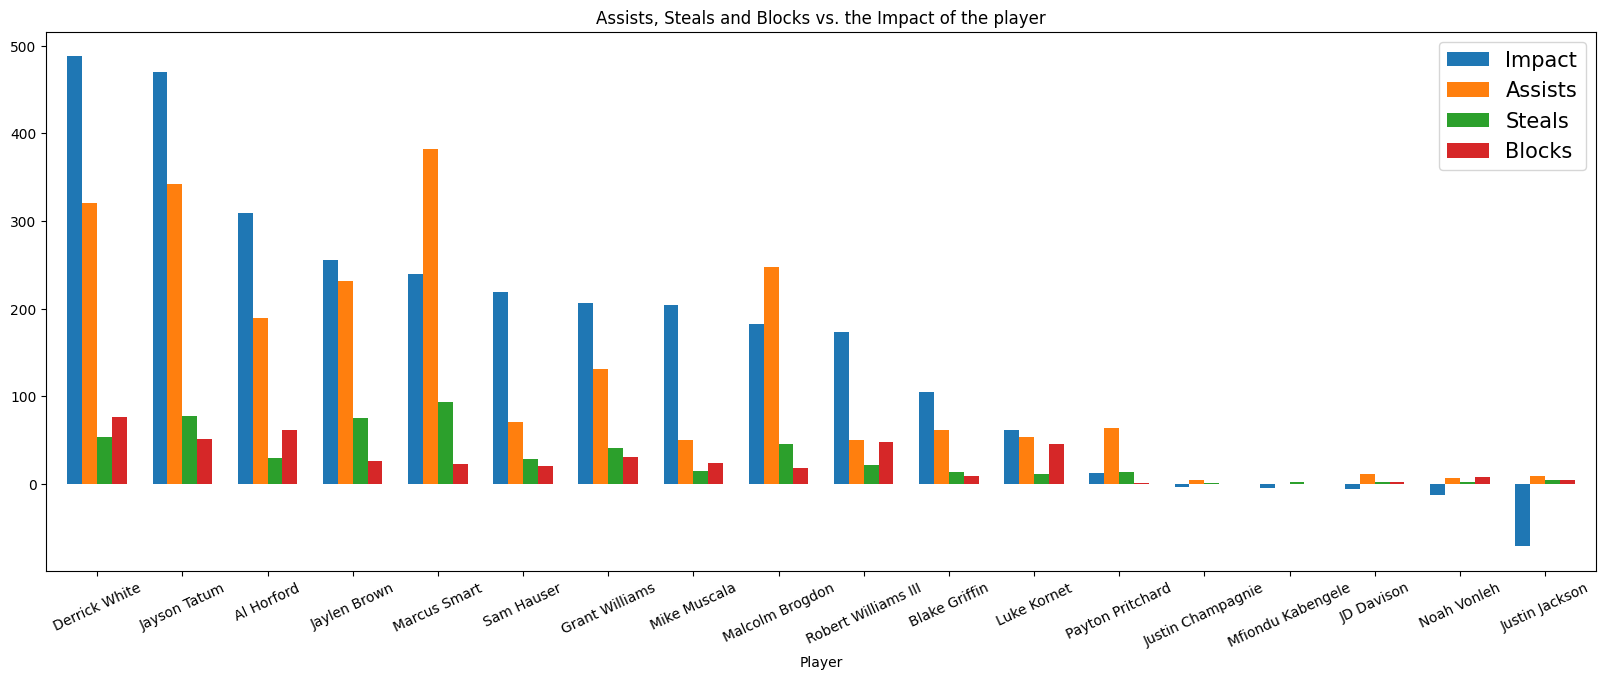

In [77]:
team_BOS = basketball_data[basketball_data['Team']=='BOS']

assists = team_BOS['AST']
steals = team_BOS['STL']
blocks = team_BOS['BLK']

mean_df = pd.concat([team_BOS['PName'], assists,steals,blocks,team_BOS['+/-']], axis=1).reset_index()
mean_df = mean_df.sort_values(by=['+/-'], ascending=False)

ax = mean_df.plot(x="PName", y=["+/-", "AST","STL", "BLK"], kind="bar",width=0.7,rot=25,figsize=(20,7))

plt.legend([ "Impact","Assists","Steals","Blocks"],fontsize=15)
plt.xlabel('Player')
plt.title('Assists, Steals and Blocks vs. the Impact of the player')
plt.show()

This one is better, but still not so readable for the last players which have small or even negative metrics.<br><br>
Other solution is to look separately at each metrics versus the impact and than compare the plots.

In [84]:
team_BOS = basketball_data[basketball_data['Team']=='BOS']

alt.Chart(team_BOS).mark_circle(size=120).encode(
    x=alt.X('PName:N', title='Player Name'),
    y=alt.Y('AST:Q', title='Assists'),
    color=alt.Color('+/-:Q', title='Impact'),
    tooltip=['PName', 'AST', '+/-']
).properties(
    title='Assists vs. Impact for team Boston'
)

alt.Chart(...)

This plot looks good and achieve it purpose, but I find it hard to read the player names on the x axis.<br>
Let's try to put the numerical variables on the axes and the color to be by the name of the player.

In [85]:
team_BOS = basketball_data[basketball_data['Team']=='BOS']

alt.Chart(team_BOS).mark_circle(size=120).encode(
    x=alt.X('+/-:Q', title='Impact'),
    y=alt.Y('AST:Q', title='Assists'),
    color=alt.Color('PName:N', title='Player Name'),
    tooltip=['PName', 'AST', '+/-']
).properties(
    title='Assists vs. Impact for team Boston'
)

alt.Chart(...)

Let's see more metrics together to compare them.

In [88]:
team_BOS = basketball_data[basketball_data['Team']=='BOS']

chart_ast = alt.Chart(team_BOS).mark_circle(size=120).encode(
    x=alt.X('+/-:Q', title='Impact'),
    y=alt.Y('AST:Q', title='Assists'),
    color=alt.Color('PName:N', title='Player Name'),
    tooltip=['PName', 'AST', '+/-']
).properties(
    title='Assists vs. Impact for team Boston'
)


chart_points = alt.Chart(team_BOS).mark_circle(size=120).encode(
    x=alt.X('+/-:Q', title='Impact'),
    y=alt.Y('PTS:Q', title='Total no of points'),
    color=alt.Color('PName:N', title='Player Name'),
    tooltip=['PName', 'PTS', '+/-']
).properties(
    title='Total points vs. Impact for team Boston'
)

chart_rebounds = alt.Chart(team_BOS).mark_circle(size=120).encode(
    x=alt.X('+/-:Q', title='Impact'),
    y=alt.Y('REB:Q', title='Rebounds'),
    color=alt.Color('PName:N', title='Player Name'),
    tooltip=['PName', 'REB', '+/-']
).properties(
    title='Rebounds vs. Impact for team Boston'
)

chart_stl= alt.Chart(team_BOS).mark_circle(size=120).encode(
    x=alt.X('+/-:Q', title='Impact'),
    y=alt.Y('STL:Q', title='Steals'),
    color=alt.Color('PName:N', title='Player Name'),
    tooltip=['PName', 'STL', '+/-']
).properties(
    title='Steals vs. Impact for team Boston'
)


chart_blk = alt.Chart(team_BOS).mark_circle(size=120).encode(
    x=alt.X('+/-:Q', title='Impact'),
    y=alt.Y('BLK:Q', title='No of blocks'),
    color=alt.Color('PName:N', title='Player Name'),
    tooltip=['PName', 'BLK', '+/-']
).properties(
    title='Blocks vs. Impact for team Boston'
)

chart_fouls = alt.Chart(team_BOS).mark_circle(size=120).encode(
    x=alt.X('+/-:Q', title='Impact'),
    y=alt.Y('PF:Q', title='Personal fouls'),
    color=alt.Color('PName:N', title='Player Name'),
    tooltip=['PName', 'PF', '+/-']
).properties(
    title='Fouls vs. Impact for team Boston'
)

chart = alt.vconcat(alt.hconcat(chart_ast, chart_points), alt.hconcat(chart_stl, chart_blk), alt.hconcat(chart_rebounds, chart_fouls))
chart

alt.VConcatChart(...)

I think it would help if we add a regression line for each plot.

In [89]:
team_BOS = basketball_data[basketball_data['Team']=='BOS']

chart_ast = chart_ast + chart_ast.transform_regression('AST', '+/-').mark_line(color='red')
chart_points = chart_points + chart_points.transform_regression('PTS', '+/-').mark_line(color='red')
chart_rebounds = chart_rebounds + chart_rebounds.transform_regression('REB', '+/-').mark_line(color='red')
chart_stl = chart_stl + chart_stl.transform_regression('STL', '+/-').mark_line(color='red')
chart_blk = chart_blk + chart_blk.transform_regression('BLK', '+/-').mark_line(color='red')
chart_fouls = chart_fouls + chart_fouls.transform_regression('PF', '+/-').mark_line(color='red')

chart = alt.vconcat(alt.hconcat(chart_ast, chart_points), alt.hconcat(chart_stl, chart_blk), alt.hconcat(chart_rebounds, chart_fouls))
chart

alt.VConcatChart(...)

Moving on, we can analyse a single player, his strengths and weaknesses.<br>
Being the only one NBA player I know, I will choose Nikola Jokic.<br>

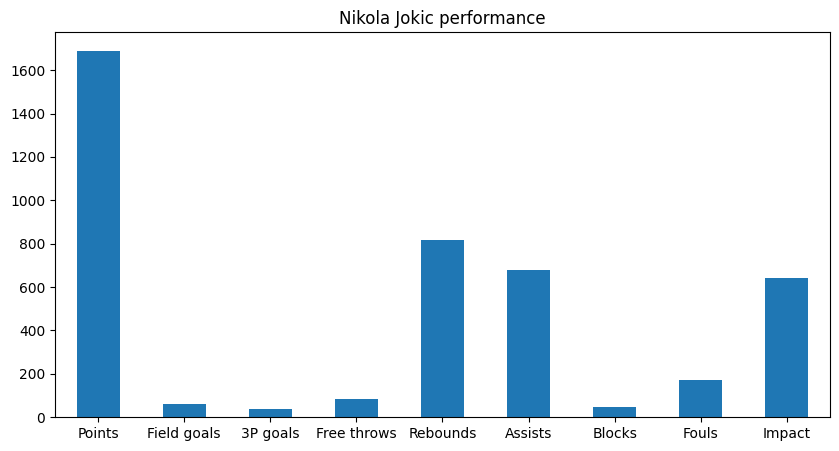

In [114]:
jokic = basketball_data[basketball_data['PName']=='Nikola Jokic'].reset_index()
var_labels = ["PTS","FG%","3P%","FT%","REB","AST","BLK","PF", "+/-"]
jokic_series = pd.Series(jokic.squeeze(axis=0), index =var_labels) 
# jokic_series =jokic_series.sort_values(ascending=False)

ax = jokic_series.plot(kind="bar",figsize=(10, 5))

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(["Points","Field goals","3P goals","Free throws","Rebounds","Assists","Blocks","Fouls", "Impact"],rotation=0)
plt.title("Nikola Jokic performance")
plt.show()

This plot does not seem to be meaningful at all.<br>
To make it more meaningful, we can compare Jokic's metrics with the average value.

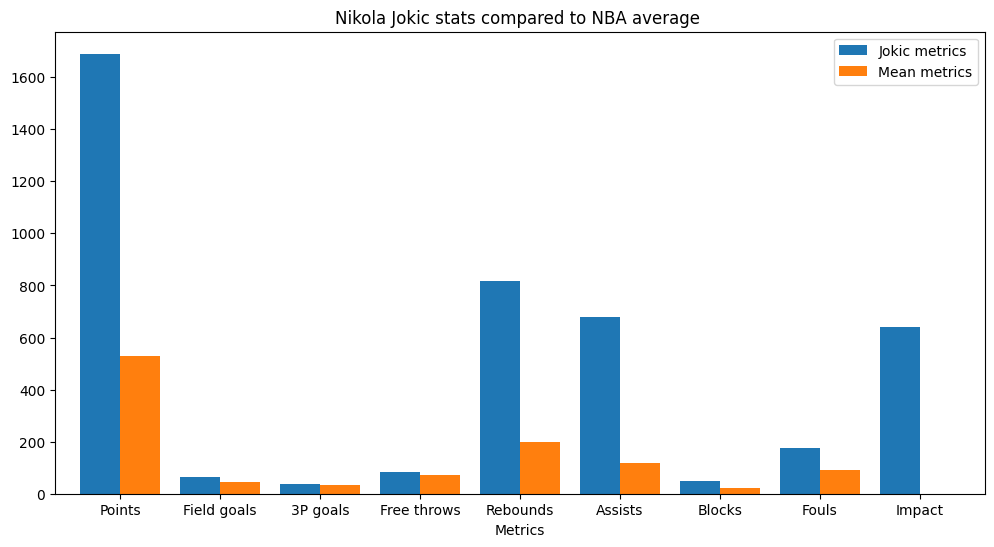

In [115]:
jokic = basketball_data[basketball_data['PName']=='Nikola Jokic'].reset_index()
jokic = jokic.squeeze(axis=0)

mean_values = []
jokic_values = []
var_labels = ["PTS","FG%","3P%","FT%","REB","AST","BLK","PF", "+/-"]

for variable in var_labels:
    mean_values.append(basketball_data[variable].mean())
    jokic_values.append(jokic[variable])

mean_series = pd.Series(mean_values, index =var_labels)
jokic_series = pd.Series(jokic_values, index =var_labels) 

concat_df = pd.concat([mean_series.rename('Mean'), jokic_series.rename('Jokic')], axis=1).reset_index()
# concat_df = concat_df.sort_values(by=['Jokic'], ascending=False)

ax = concat_df.plot(x="index", y=[ "Jokic", "Mean"], kind="bar",width=0.8,rot=0,figsize=(12,6))

plt.legend(["Jokic metrics", "Mean metrics"])
plt.xlabel('Metrics')
plt.title("Nikola Jokic stats compared to NBA average ")

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(["Points","Field goals","3P goals","Free throws","Rebounds","Assists","Blocks","Fouls", "Impact"],rotation=0)
plt.show()


This plot clearly shows the advantage of Jokic over the other players from NBA. <br>
This plot also justifies why Jokic is the only NBA player I know :)
<br><br>
And look at the impact. Jokic has such a high impact on his team when he is on field, but seems that there's a problem with all players average value for the impact. We can check this manually.

In [123]:
print("NBA impact mean: " + str(basketball_data['+/-'].mean()))
print("Jokic impact: " +str(basketball_data[basketball_data['PName']=='Nikola Jokic'].squeeze(axis=0)['+/-']))

NBA impact mean: 0.0149812734082397
Jokic impact: 640


Ok, there is no problem. Just an outstanding performance for Jokic.

Let's make some player rankings and see the top 10 defenders.<br>
To achieve this, we will compute a defensive score for each player that takes into consideration the following metrics:
- Steals
- Blocks
- Defensive rebounds

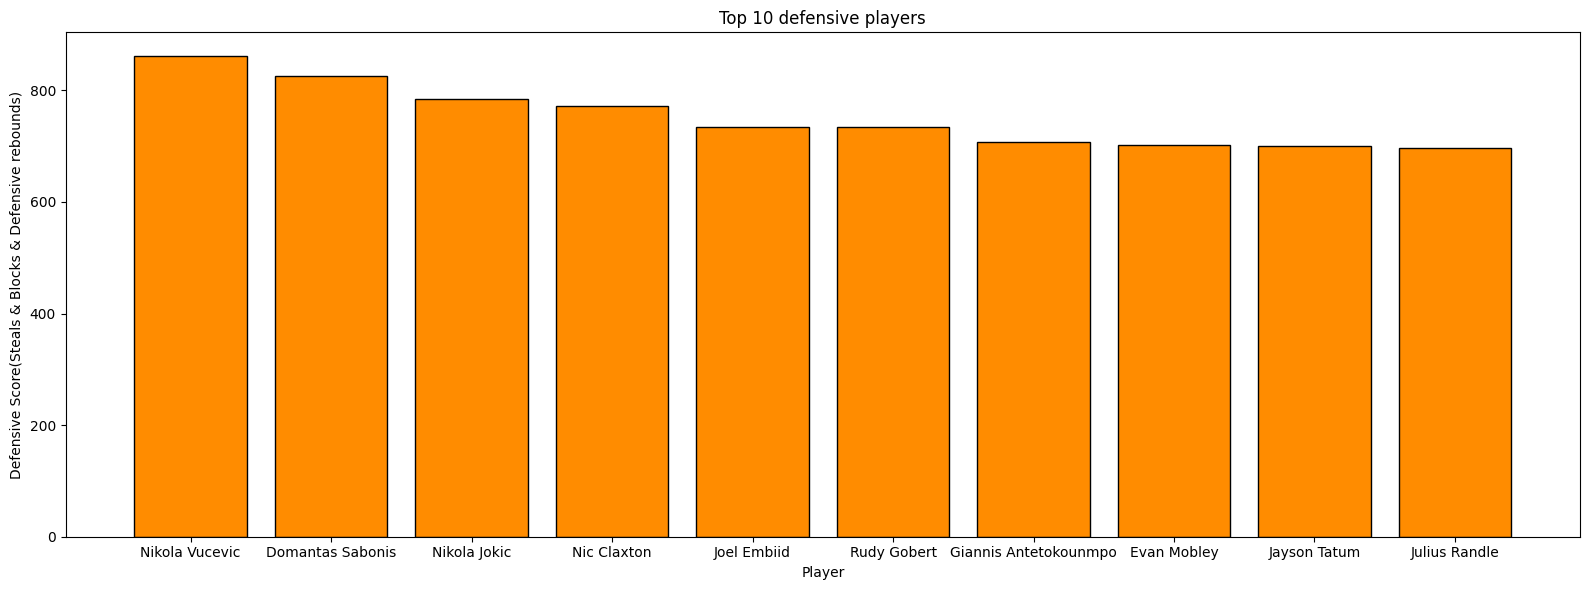

In [130]:
basketball_data['DEF_Score'] = basketball_data['STL'] + basketball_data['BLK'] + basketball_data['DREB']
top_10_def = basketball_data.sort_values(by='DEF_Score',ascending=False).head(10)

plt.figure(figsize=(16, 6))
plt.bar(top_10_def['PName'], top_10_def['DEF_Score'], color='darkorange', edgecolor='black')

plt.title('Top 10 defensive players')
plt.xlabel('Player')
plt.ylabel('Defensive Score(Steals & Blocks & Defensive rebounds)')
plt.tight_layout()
plt.show()

In the same manner, let's see the top 10 best offensive players by considering:
- Total number of points
- Assists

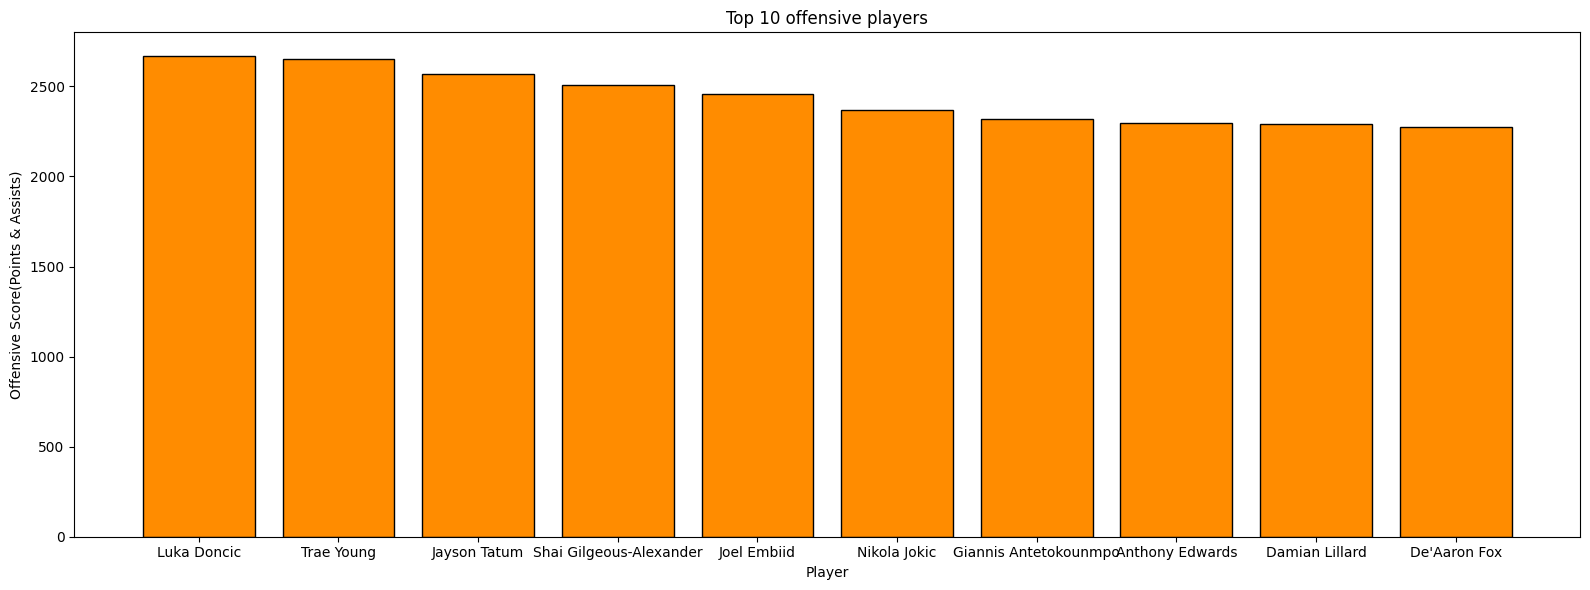

In [146]:
basketball_data['OFF_Score'] = basketball_data['PTS'] + basketball_data['AST'] 
top_10_off = basketball_data.sort_values(by='OFF_Score',ascending=False).head(10)

plt.figure(figsize=(16, 6))
plt.bar(top_10_off['PName'], top_10_off['OFF_Score'], color='darkorange', edgecolor='black')

plt.title('Top 10 offensive players')
plt.xlabel('Player')
plt.ylabel('Offensive Score(Points & Assists)')
plt.tight_layout()
plt.show()

It is interesting that Jokic is only on the 6th place regarding this metrics.
Let's compare Luka Doncic and Nikola Jokic metrics.

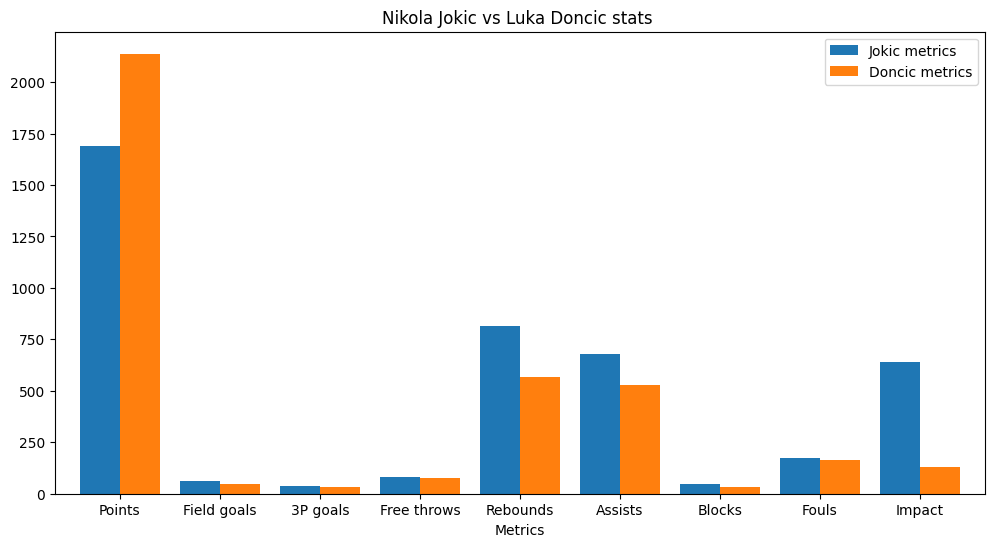

In [132]:
jokic = basketball_data[basketball_data['PName']=='Nikola Jokic'].reset_index()
jokic = jokic.squeeze(axis=0)

doncic = basketball_data[basketball_data['PName']=='Luka Doncic'].reset_index()
doncic = doncic.squeeze(axis=0)

doncic_values = []
jokic_values = []
var_labels = ["PTS","FG%","3P%","FT%","REB","AST","BLK","PF", "+/-"]

for variable in var_labels:
    doncic_values.append(doncic[variable])
    jokic_values.append(jokic[variable])

doncic_series = pd.Series(doncic_values, index =var_labels)
jokic_series = pd.Series(jokic_values, index =var_labels) 

concat_df = pd.concat([doncic_series.rename('Doncic'), jokic_series.rename('Jokic')], axis=1).reset_index()
ax = concat_df.plot(x="index", y=[ "Jokic", "Doncic"], kind="bar",width=0.8,rot=0,figsize=(12,6))

plt.legend(["Jokic metrics", "Doncic metrics"])
plt.xlabel('Metrics')
plt.title("Nikola Jokic vs Luka Doncic stats ")

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(["Points","Field goals","3P goals","Free throws","Rebounds","Assists","Blocks","Fouls", "Impact"],rotation=0)
plt.show()

We can see that Jokic is better on defense, fact also highlighted in the prevoius 2 plots (top 10 deffensive and offensive).

Let's also find the top 5 teams by points scored.

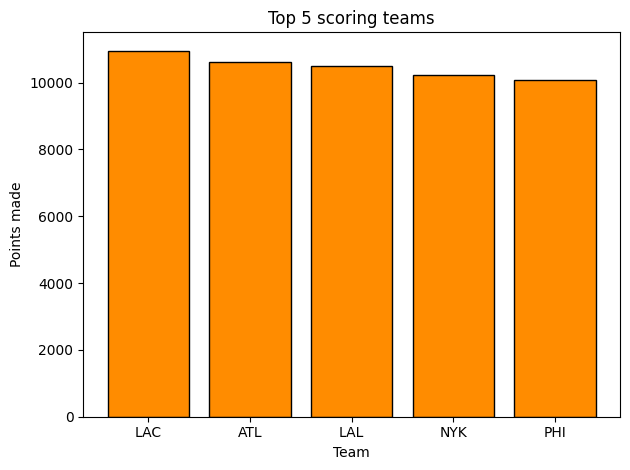

In [140]:
teams_points_df = basketball_data.groupby('Team')['PTS'].sum().reset_index(name ='Points')
top_score = teams_points_df.sort_values(by='Points',ascending=False).head(5)

plt.bar(top_score['Team'], top_score['Points'], color='darkorange', edgecolor='black')

plt.title('Top 5 scoring teams')
plt.xlabel('Team')
plt.ylabel('Points made')
plt.tight_layout()
plt.show()

Knowing that Luka Doncic is the best offensive (considering the metrics mentioned above) let's see if he plays for the team with best scoring.

In [149]:
print("Luka Doncic team: " + str(basketball_data[basketball_data['PName']=='Luka Doncic'].squeeze(axis=0)['Team']))
print("Trae Young team: " + str(basketball_data[basketball_data['PName']=='Trae Young'].squeeze(axis=0)['Team']))

Luka Doncic team: DAL
Trae Young team: ATL


The first 2 offensive players (considering points and assists) are not playing for the best scoring team (Los Angeles Clippers) which happily highlight the power of the team in basketball game. :)